#### 1. Importing libraries and data

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import openpyxl

In [47]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [48]:
path = r'C:\Users\

In [50]:
df_airbnb = pd.read_csv(os.path.join(path, '2 - Airbnb - Data', 'Prepared Data', 'df_airbnb_v2_rev.csv'))

df_airbnb.dtypes

In [28]:
df_airbnb.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'name', 'host_id', 'host_name',
       'area', 'district', 'latitude', 'longitude', 'room_type', 'price',
       'min_nights', 'nr_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price category'],
      dtype='object')

In [51]:
# Dropping unnamed column
df_airbnb1 = df_airbnb.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

#### 2. Elbow technique

In [52]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [ ]:
score = [kmeans[i].fit(df_airbnb2).score(df_airbnb2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

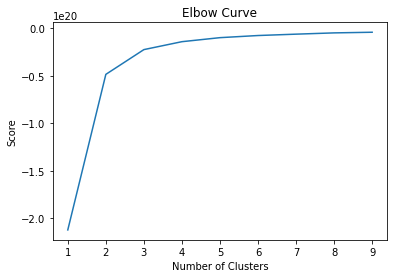

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In the Airbnb dataset, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(df_airbnb2)

C:\Users\laune\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [36]:
df_airbnb2['clusters'] = kmeans.fit_predict(df_airbnb2)

C:\Users\laune\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [37]:
df_airbnb2.head()

,id,host_id,latitude,longitude,price,min_nights,nr_reviews,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,1944,2164,52.54425,13.39749,20,60,18,0.20,3,251,2
1,2015,2217,52.53454,13.40256,59,5,135,2.24,6,173,2
2,3176,3718,52.53500,13.41758,90,62,147,1.03,1,348,2
3,3309,4108,52.49885,13.34906,29,7,27,0.29,1,364,2
4,6883,16149,52.51171,13.45477,79,7,135,1.00,1,0,2


In [38]:
df_airbnb2['clusters'].value_counts()

2    12604
0     4296
1     2861
Name: clusters, dtype: int64

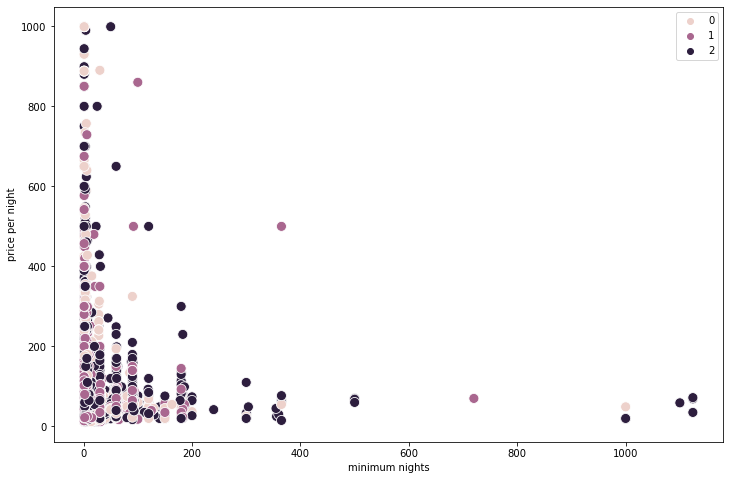

In [39]:
# Plot the clusters for the "price" and "min nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_airbnb2['min_nights'], y=df_airbnb2['price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('minimum nights') # Label x-axis.
plt.ylabel('price per night') # Label y-axis.
plt.show()

#### There is no visible linear connection between the variables. Most of the dots are concentrated between the values 0 and 150, meaning that most of the bookings happens for shorter period of time (confirming that airbnb is mostly used for shor stay, even if there is a pattern of stays lasting more than 1 month)

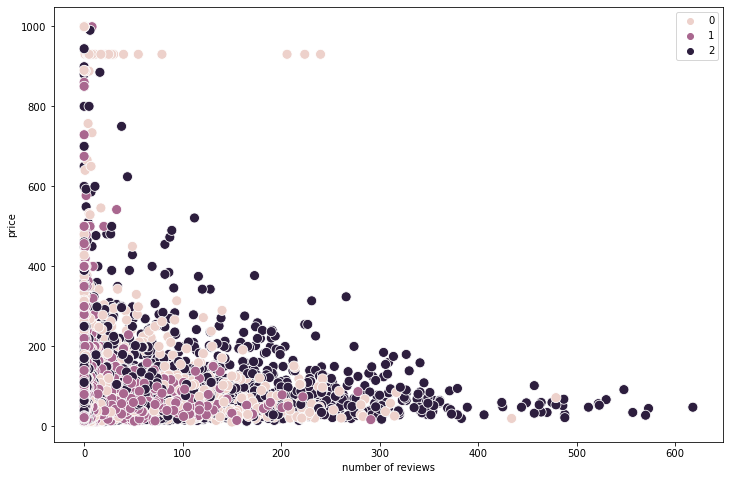

In [40]:
# Plot the clusters for the "nr reviews" and "price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_airbnb2['nr_reviews'], y=df_airbnb2['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('number of reviews') 
plt.ylabel('price') 
plt.show()

In [41]:
df_airbnb2.loc[df_airbnb2['clusters'] == 2, 'cluster'] = 'dark purple'
df_airbnb2.loc[df_airbnb2['clusters'] == 1, 'cluster'] = 'purple'
df_airbnb2.loc[df_airbnb2['clusters'] == 0, 'cluster'] = 'pink'

In [42]:
df_airbnb2.groupby('cluster').agg({'price':['mean', 'median'], 
                         'min_nights':['mean', 'median'], 
                         'nr_reviews':['mean', 'median'],
                          'availability_365':['mean', 'median']})

price        min_nights        nr_reviews         \
                  mean median       mean median       mean median   
cluster                                                             
dark purple  64.650032     50   9.473738      3  25.580689      5   
pink         71.168529     50   6.368017      2  19.903166      5   
purple       71.310381     55   8.315973      2   9.414191      2   

            availability_365         
                        mean median  
cluster                              
dark purple        86.700571      0  
pink               92.552607      0  
purple            132.173016     88

##### all the cluster do have a minimum stay of 6 nights and an average price above 65 euros. the mean availability_365 between the cluster is between 86 and 132, but if we look at the median of the dark and pink cluster the median is "0", meaning that there are a lot of accomodations published online, but not available.

##### Since the listings and data have been collected in March 2021, it might be that due to the pandemic the accomodation description was still online, but the calender not available due to the local lockdown restrictions.

In [45]:
df_airbnb2.to_excel(os.path.join(path,'2 - Airbnb - Data','Prepared Data','berlin_cane_cluster.xlsx'))